In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math
import copy
from collections import OrderedDict

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl
from tqdm.notebook import tqdm

sys.path.append('..')
from utils import get_config
from experiment import Experiment, show_mcmc_report, run_experiments
from plotting import my_mollview, plot_correlation_matrix, plot_correlation, plot_many_data_correlations

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

# Run experiment

In [4]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'lss_mask_name': 'Mask_noise_75percent',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.0,
 'bias': 1.3,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gt'],
 'l_min': {'gg': 2, 'gt': 2},
 'ell_lengths': {'gg': [16, 16], 'gt': [16, 16]},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [5]:
experiment = Experiment(config, set_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

In [6]:
experiment.set_correlations()

# CMB lensing correlations

In [7]:
experiment.print_correlation_statistics()

sigma {'gg': 133.66164653343412, 'gk': 17.467521234894992}
chi squared {'gg': 1039.2166429356923, 'gk': 18.704414532806396}


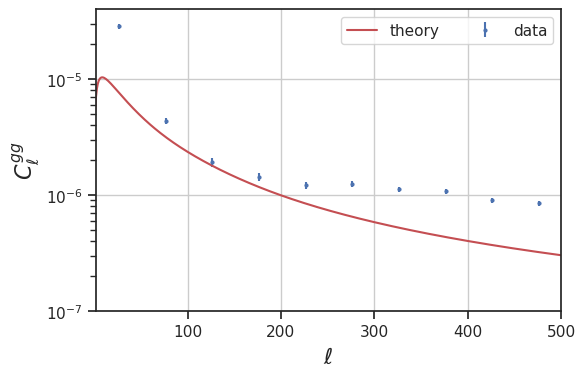

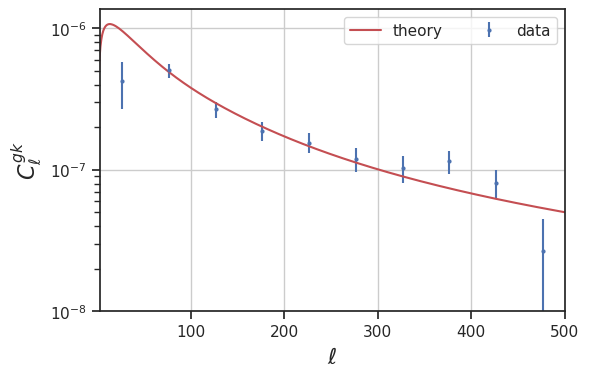

In [8]:
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

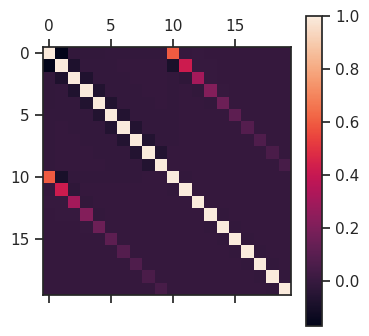

In [9]:
plot_correlation_matrix(experiment)

# CMB temperature correlations

In [23]:
experiment.print_correlation_statistics()

C_gg sigma: 15.54
C_gg chi squared: 290.78
C_gt sigma: 5.16
C_gt chi squared: 0.08


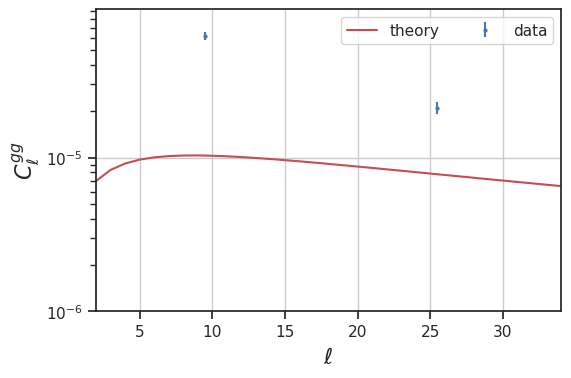

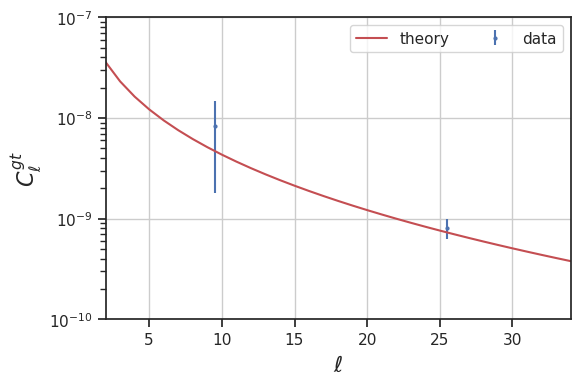

In [11]:
plot_correlation(experiment, 'gg', x_min=2, x_max=34, y_min=1e-6, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gt', x_min=2, x_max=34, y_min=1e-10, y_max=1e-7, x_scale='linear', y_scale='log')

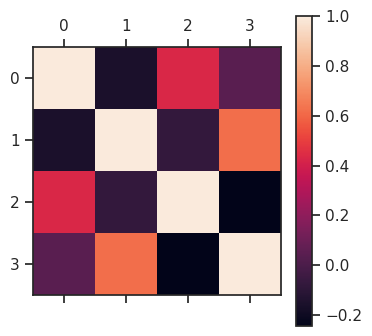

In [10]:
plot_correlation_matrix(experiment)

# Binning experiments

In [5]:
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'lss_mask_name': 'Mask_noise_75percent',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.0,
 'bias': 1.3,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [7]:
ells_per_bin_arr = [2, 4, 8, 16, 32, 50, 64, 128]
params_to_update = {'ells_per_bin': [{'gg': ells_per_bin, 'gk': ells_per_bin} for ells_per_bin in ells_per_bin_arr]}

experiments = run_experiments(config, params_to_update, pre_data=True, pre_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

  0%|          | 0/8 [00:00<?, ?it/s]

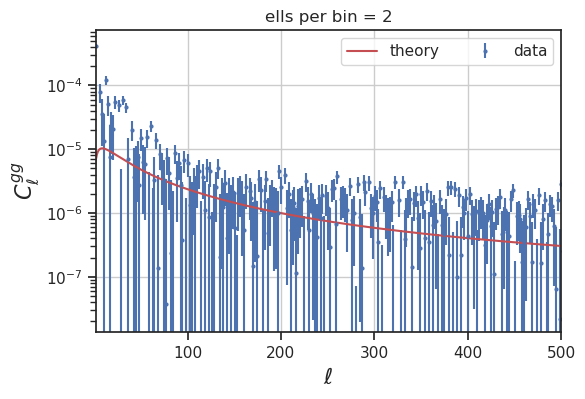

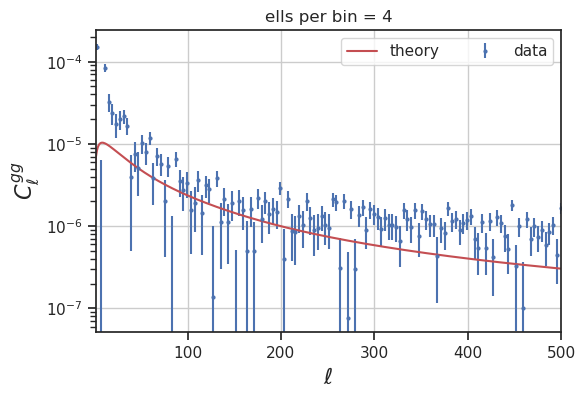

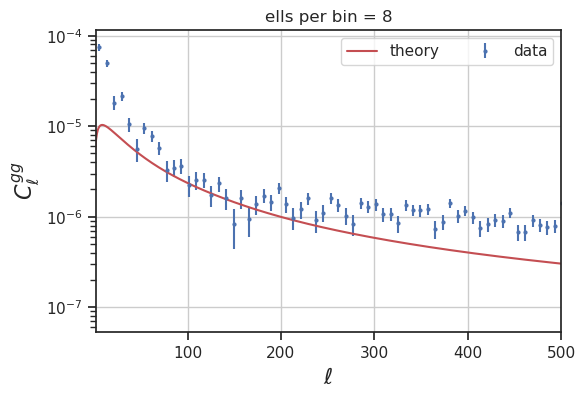

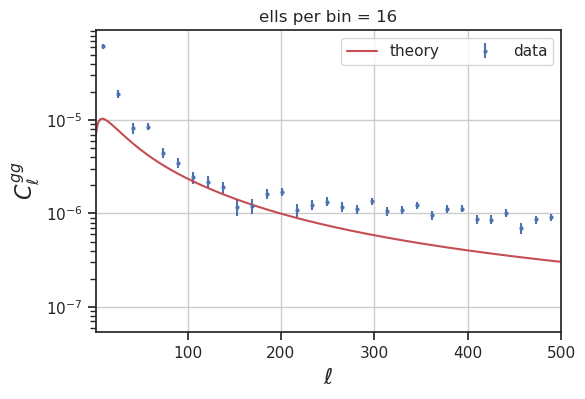

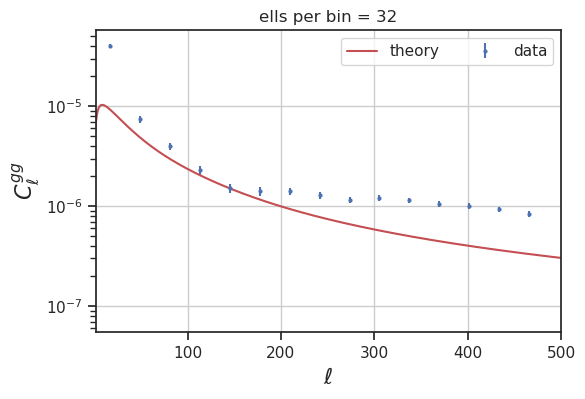

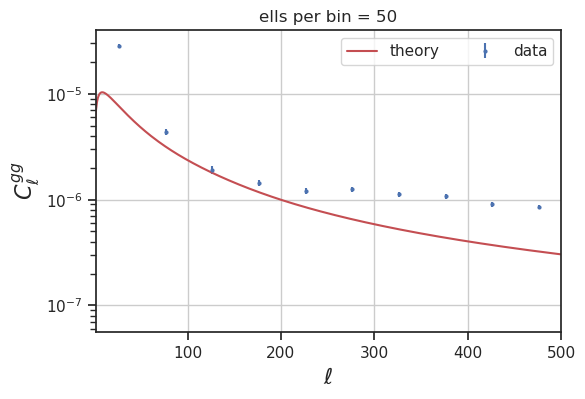

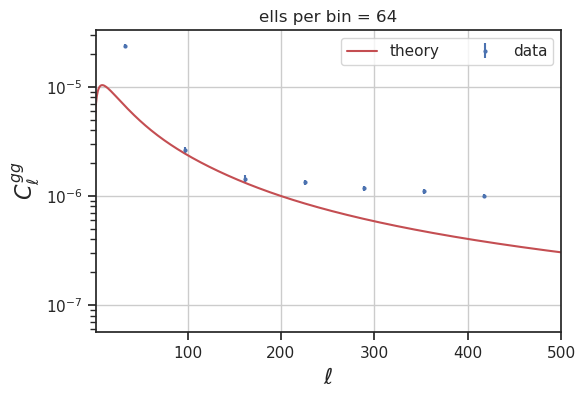

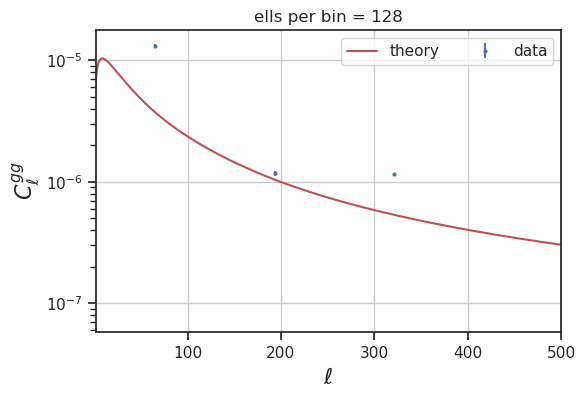

In [8]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

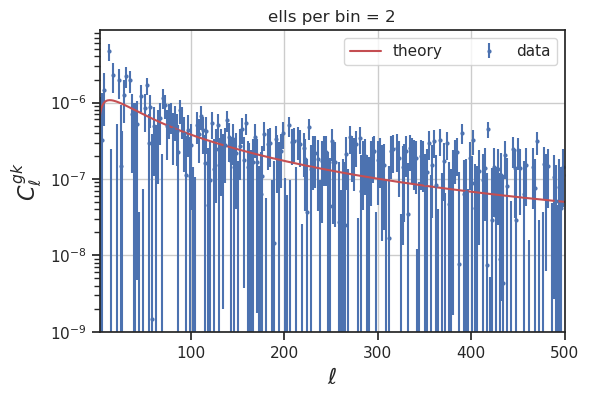

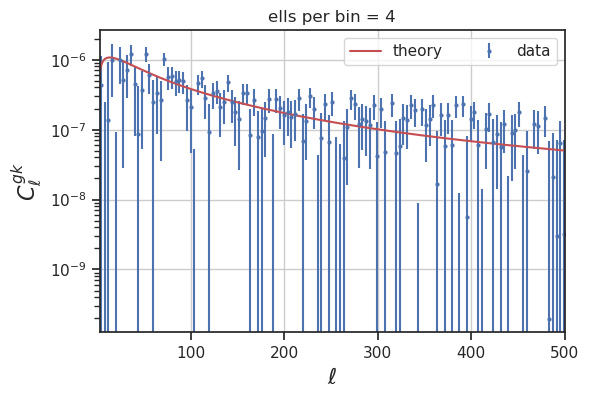

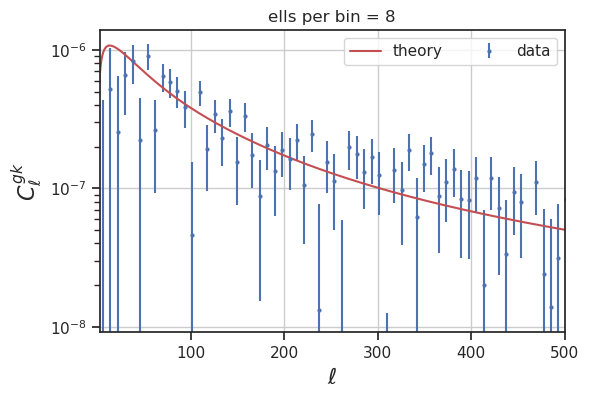

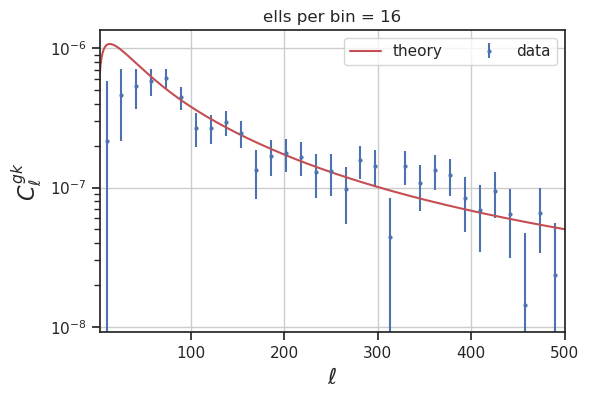

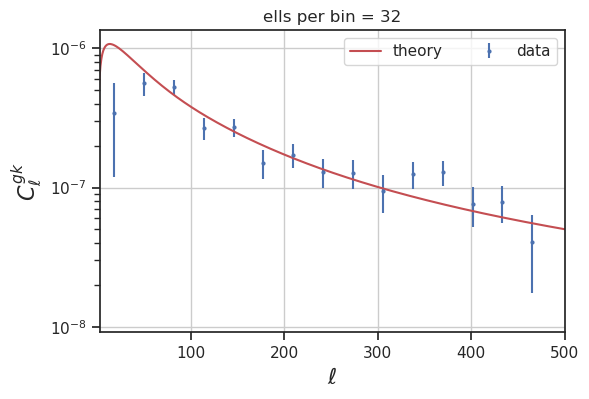

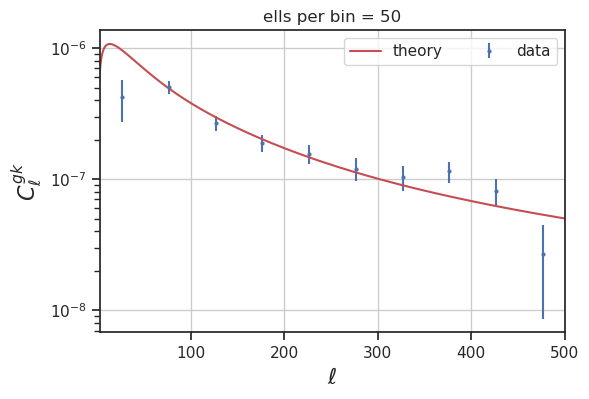

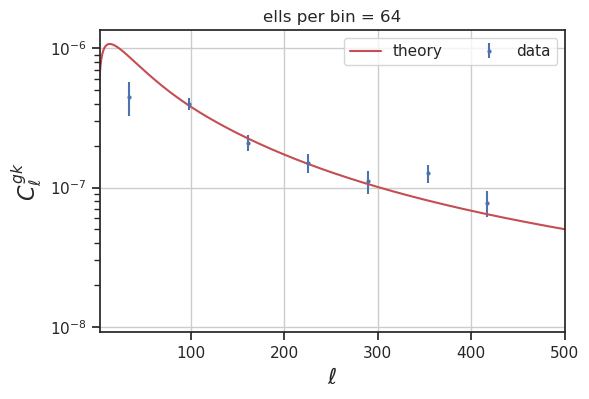

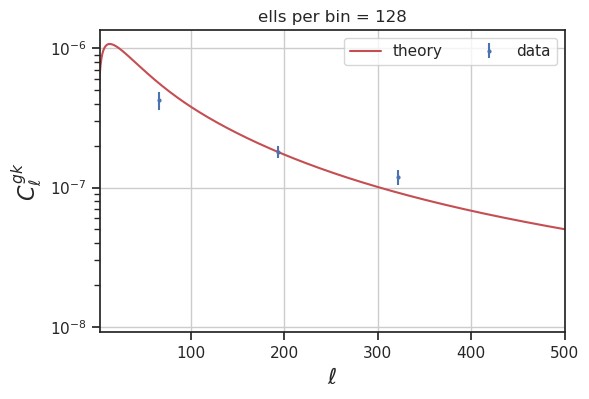

In [9]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

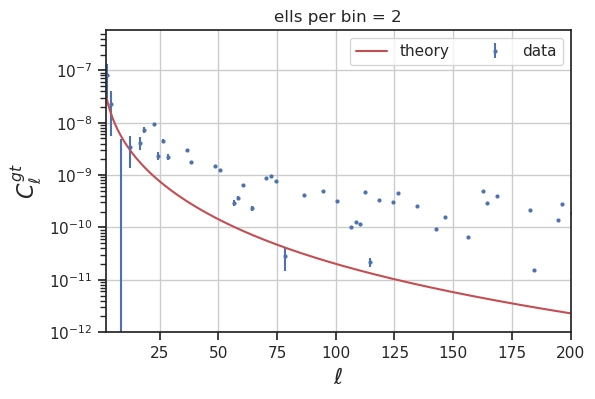

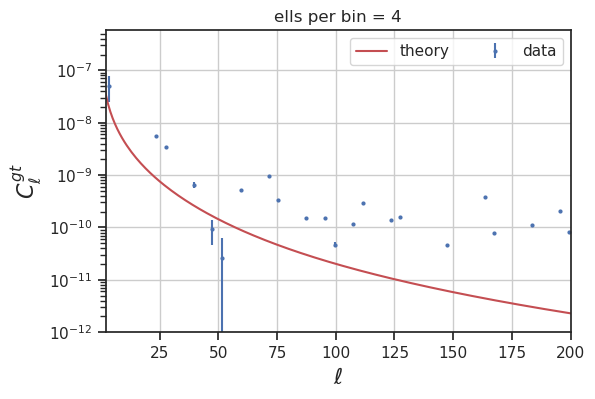

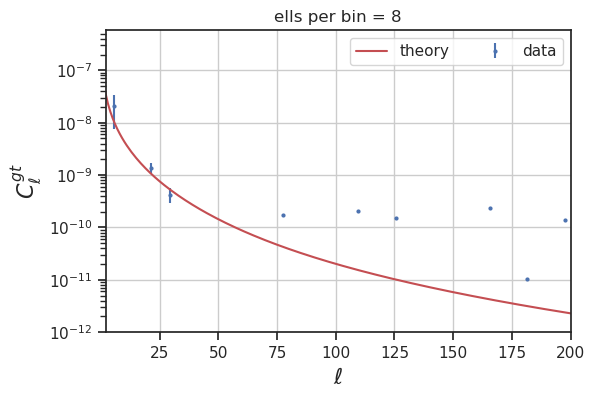

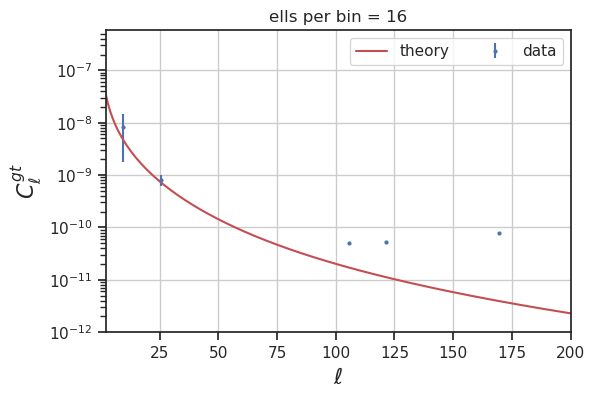

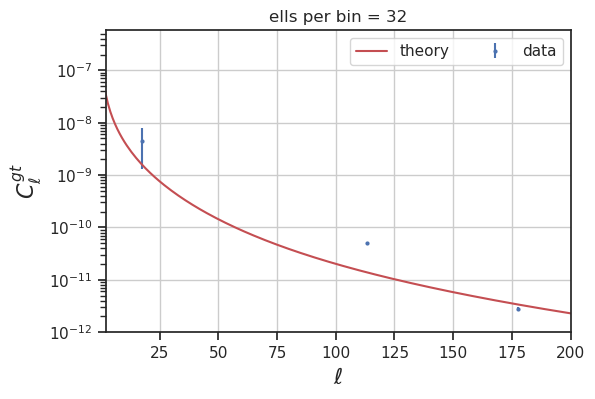

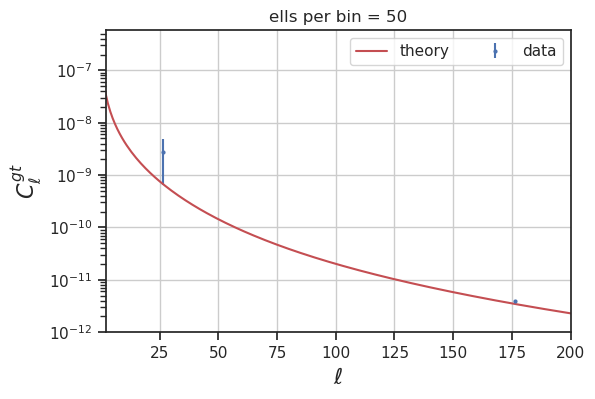

In [7]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gt', x_min=2, x_max=200, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

## Mask experiments

In [6]:
params_to_update = {
    'lss_mask_name': ['Mask_coverage', 'Mask_default', 'Mask_noise_99percent', 'Mask_noise_75percent', 'Mask_noise_median'],
}
experiments = run_experiments(config, params_to_update, pre_data=True, pre_maps=False)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


  0%|          | 0/5 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


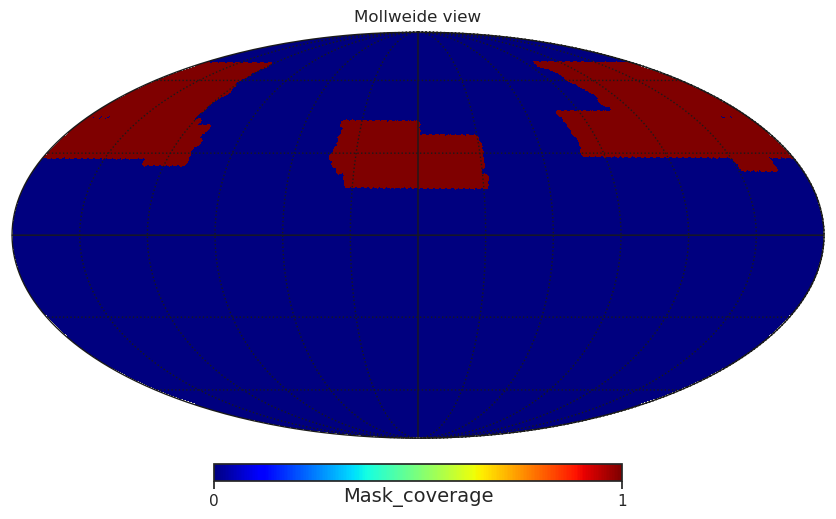

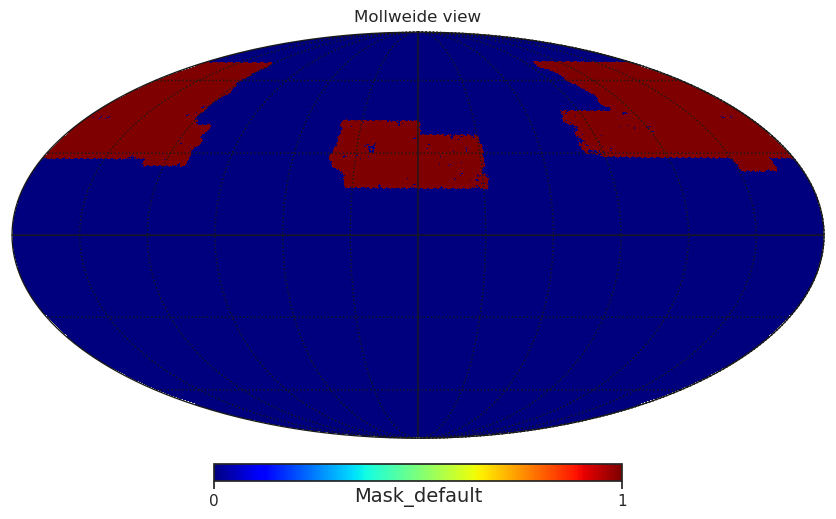

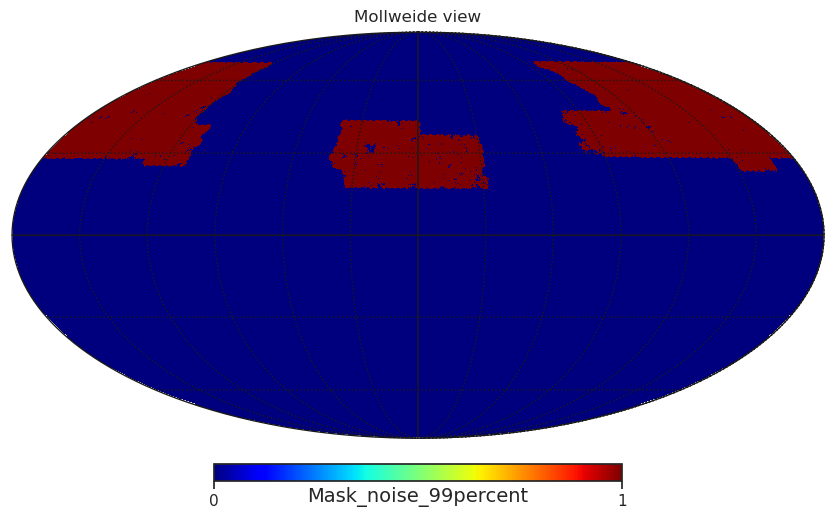

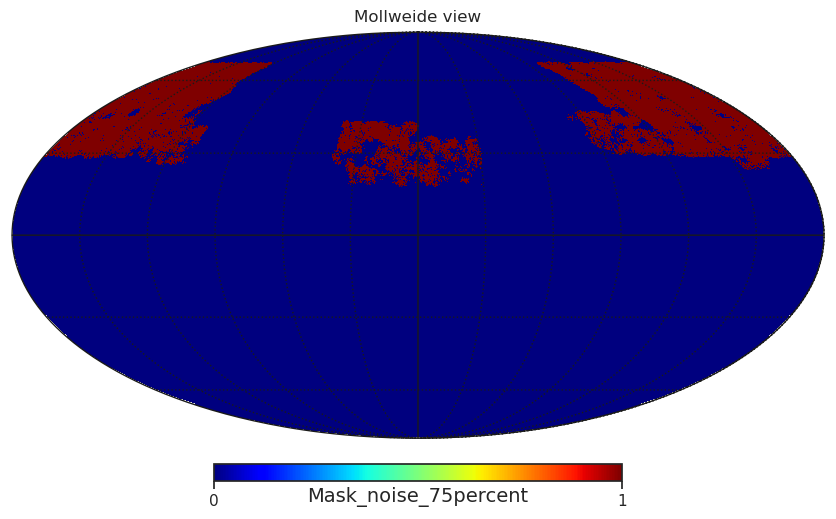

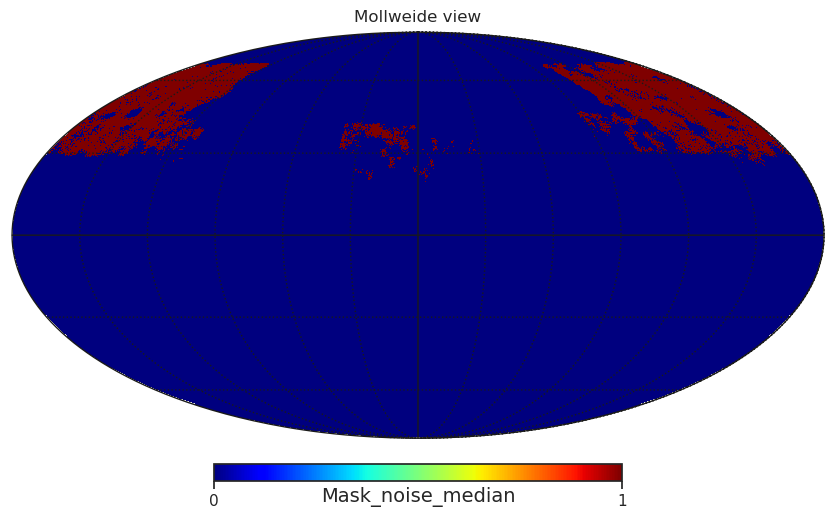

In [6]:
for mask_name, experiment in experiments.items():
    my_mollview(experiment.masks['g'], unit=mask_name)

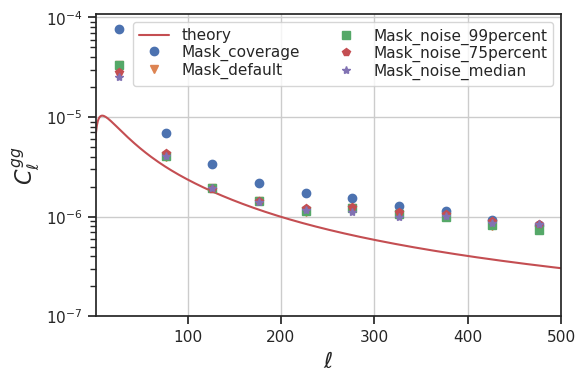

In [7]:
# 50
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

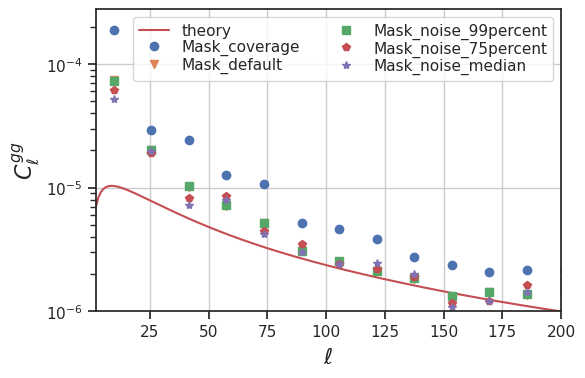

In [13]:
# 16
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=200, y_min=1e-6, y_max=None, x_scale='linear', y_scale='log')

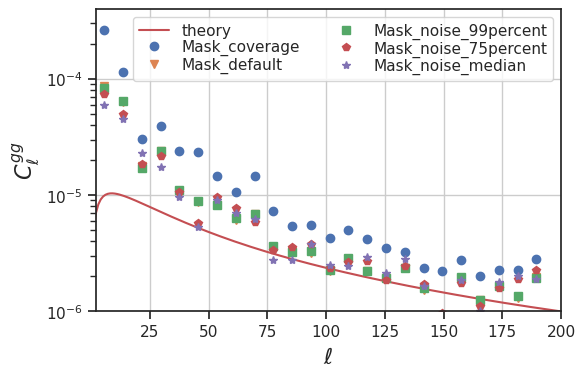

In [7]:
# 8
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=200, y_min=1e-6, y_max=None, x_scale='linear', y_scale='log')

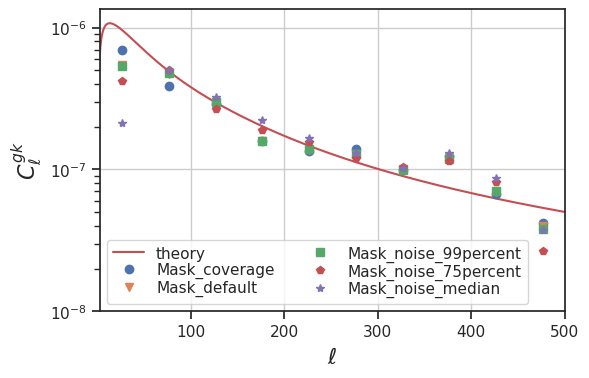

In [8]:
# 50
plot_many_data_correlations(experiments, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', legend_loc='lower left')

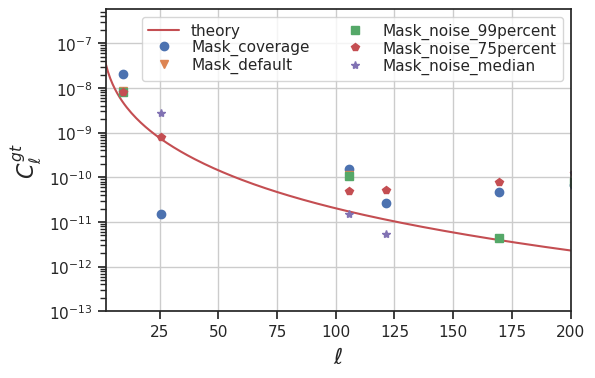

In [16]:
# 16
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=200, y_min=1e-13, y_max=None, x_scale='linear', y_scale='log')

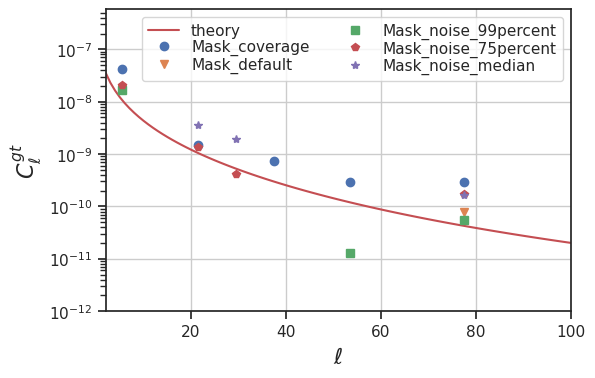

In [9]:
# 8
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=100, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log')

In [9]:
for experiment_name, experiment in experiments.items():
    print(experiment_name, experiment.chi_squared['gg'])

Mask_coverage 7198.078491577062
Mask_default 1428.532184596907
Mask_noise_99percent 1406.3709931064045
Mask_noise_75percent 1039.2166429356923
Mask_noise_median 506.61717127260596


In [10]:
for experiment_name, experiment in experiments.items():
    print(experiment_name, experiment.chi_squared['gk'])

Mask_coverage 22.148852602321284
Mask_default 19.882888882853607
Mask_noise_99percent 19.465446841578707
Mask_noise_75percent 18.704414532806396
Mask_noise_median 22.1499712311686


# Data

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 35.671516 arcmin (0.010376 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 84.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


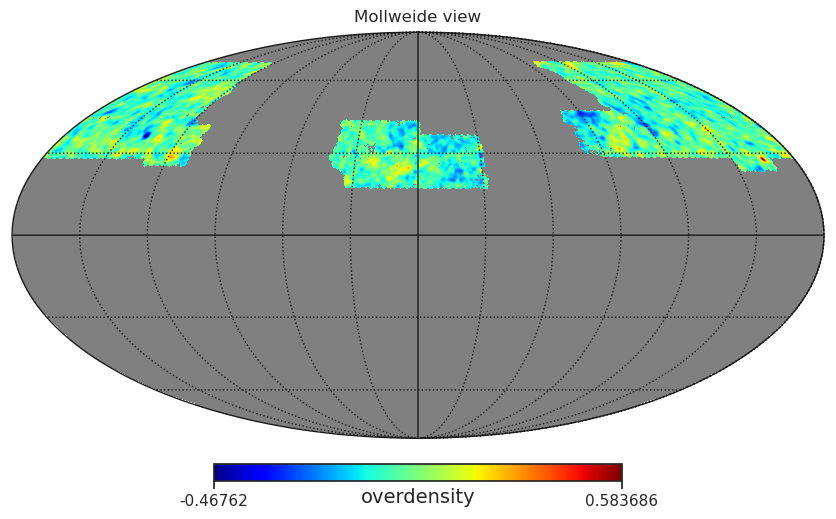

In [8]:
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=1.4)

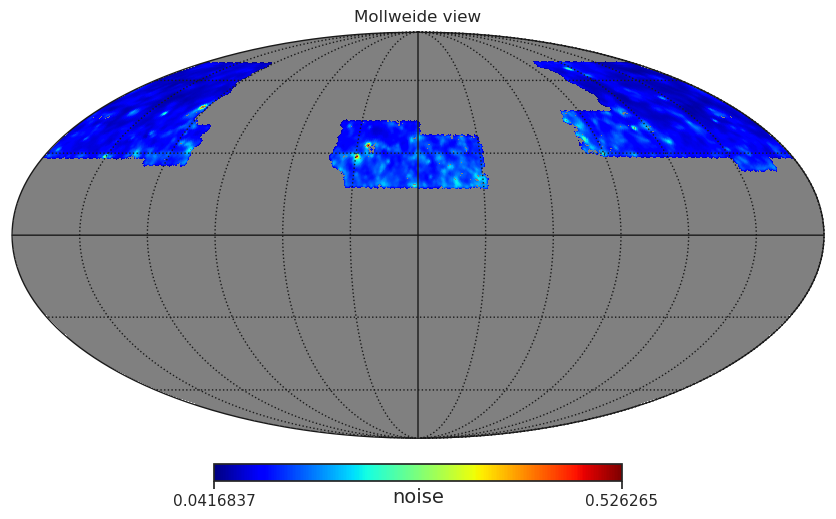

In [9]:
my_mollview(experiment.noise_maps['g'], unit='noise', fwhm=1.4)

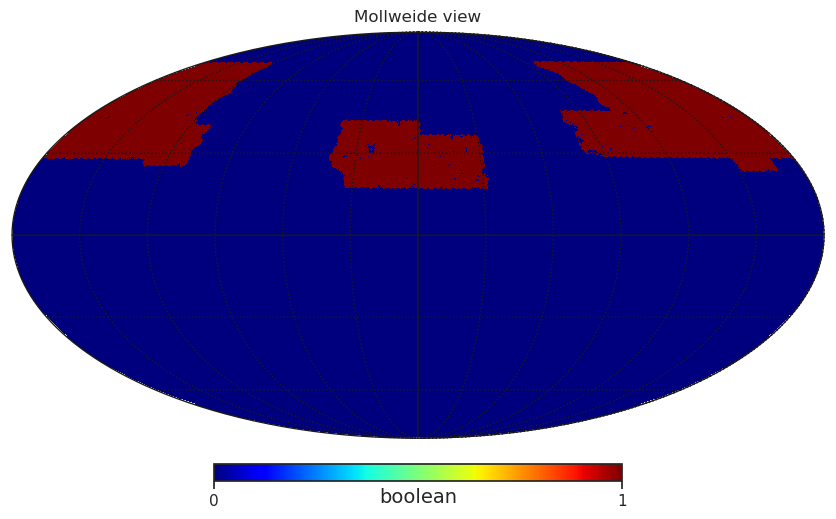

In [9]:
my_mollview(experiment.masks['g'], unit='boolean')

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 30.575585 arcmin (0.008894 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 72.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


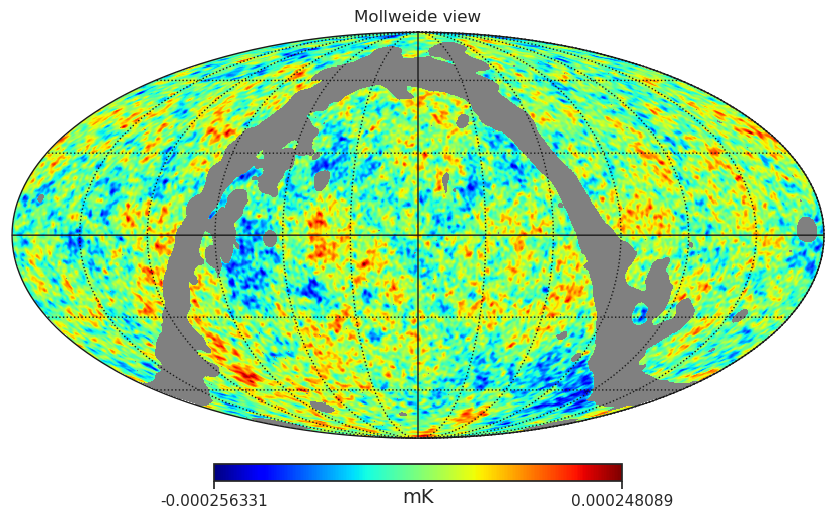

In [10]:
my_mollview(experiment.processed_maps['t'], unit='mK', fwhm=1.2)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


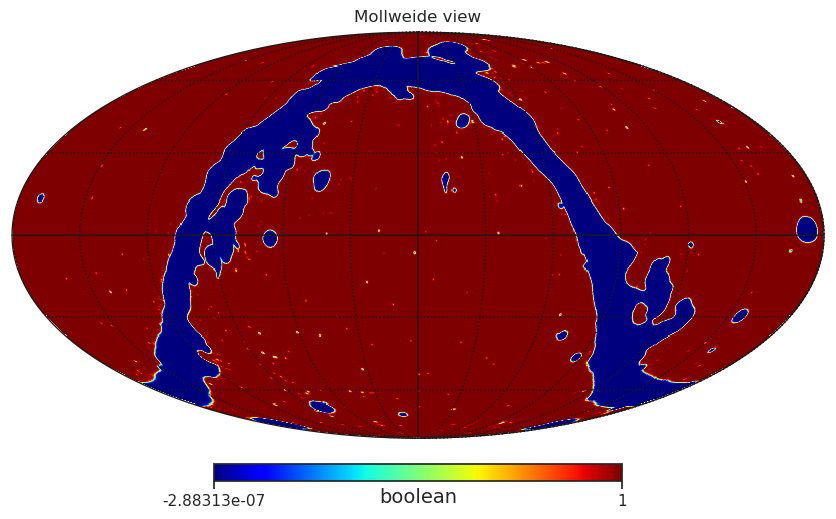

In [11]:
my_mollview(experiment.masks['t'], unit='boolean', fwhm=0.6)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 40.767446 arcmin (0.011859 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 96.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


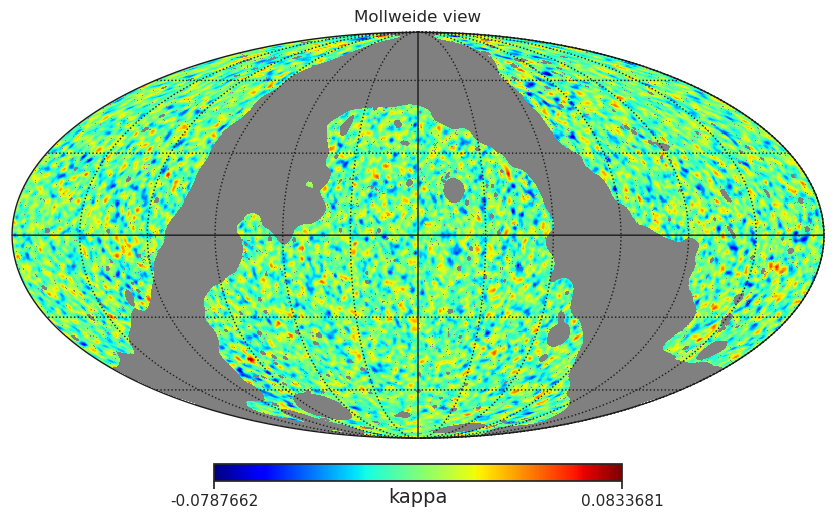

In [12]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)

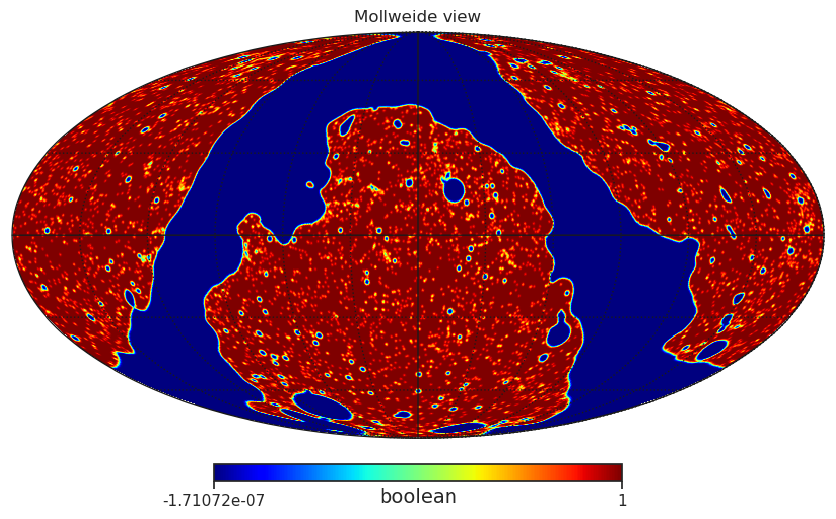

In [13]:
my_mollview(experiment.masks['k'], unit='boolean', fwhm=0.8)